# Make Validation Folder

The Kaggle dataset does not contain a validation folder. It only contains a train and test folder. We will have to remake the folders so we can make a validation folder. 

In [2]:
import os

# Before modifying the folder lets discover the data distribution in its original state.

# Define data folder containing images
data = "data/"

# Define subdirectories for train and test
train_folder = os.path.join(data, "Training/")
test_folder = os.path.join(data, "Testing/")

# Define class subdirectories for train folder
glioma_tumor_train = os.path.join(train_folder, "glioma_tumor/")
meningioma_tumor_train = os.path.join(train_folder, "meningioma_tumor")
no_tumor_train = os.path.join(train_folder, "no_tumor")
pituitary_tumor_train = os.path.join(train_folder, "pituitary_tumor")

# Define class subdirectories for test folder
glioma_tumor_test = os.path.join(test_folder, "glioma_tumor/")
meningioma_tumor_test = os.path.join(test_folder, "meningioma_tumor")
no_tumor_test = os.path.join(test_folder, "no_tumor")
pituitary_tumor_test = os.path.join(test_folder, "pituitary_tumor")

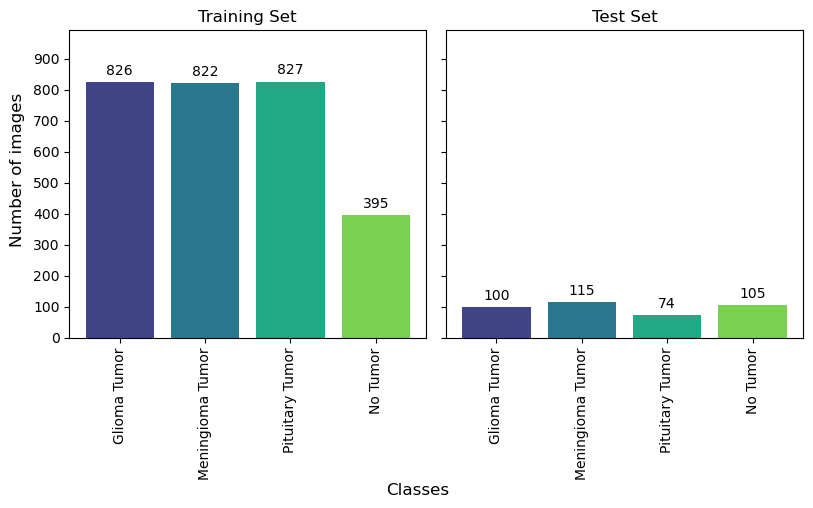

In [37]:
import matplotlib.pyplot as plt
import os
import matplotlib.ticker as ticker
%matplotlib inline

# Define counts
train_counts = {
    "Glioma Tumor": len(os.listdir(glioma_tumor_train)),
    "Meningioma Tumor": len(os.listdir(meningioma_tumor_train)),
    "Pituitary Tumor": len(os.listdir(pituitary_tumor_train)),
    "No Tumor": len(os.listdir(no_tumor_train))
}

test_counts = {
    "Glioma Tumor": len(os.listdir(glioma_tumor_test)),
    "Meningioma Tumor": len(os.listdir(meningioma_tumor_test)),
    "Pituitary Tumor": len(os.listdir(pituitary_tumor_test)),
    "No Tumor": len(os.listdir(no_tumor_test))
}

# Generate a segmented colormap
viridis = plt.cm.viridis
colors = viridis([0.2, 0.4, 0.6, 0.8])  # Divide viridis into four segments

# Plot distributions
fig, ax = plt.subplots(1, 2, figsize=(8,5), facecolor='white', sharex=True, sharey=True)

# Function to add labels on top of bars
def add_labels(ax, counts):
    for bar, count in zip(ax.patches, counts.values()):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')


# Plot Train subplot
ax[0].bar(train_counts.keys(), train_counts.values(), color=colors, label="Train")
ax[0].set_title("Training Set")
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_ylim(0, max(train_counts.values()) * 1.2)
ax[0].yaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Set major ticks to integer values
add_labels(ax[0], train_counts)

# Plot Test subplot
ax[1].bar(test_counts.keys(), test_counts.values(), color=colors, label="Test")
ax[1].set_title("Test Set")
ax[1].tick_params(axis='x', rotation=90)
add_labels(ax[1], test_counts)

# Set common x-label for both subplots
fig.text(0.5, 0, 'Classes', ha='center', fontsize=12)

# Set common y-label for both subplots
fig.text(-0.01, 0.65, 'Number of images', va='center', rotation=90, fontsize=12)

plt.tight_layout()
plt.show()

Now that we know how many images we originally had, we can now make a validation folder to view the updated distribution by taking 20% of the images in the train folder at random.

In [40]:
# Define validation folder path
from genericpath import isdir
from os import mkdir
import random
import shutil

validation_folder = os.path.join(data, "Validation/")

# Check if validation folder already exists. If it doesnt then make the folder.
if os.path.exists(validation_folder):
    print("Validation folder already exists.")
else:
    os.mkdir(validation_folder)
    for subdir in os.listdir(train_folder):
        subdir_path = os.path.join(train_folder, subdir)
        if os.path.isdir(subdir_path):
            os.makedirs(os.path.join(validation_folder, subdir))
    
    # Define percentage of images to move
    portion = 0.2
    
    # Set random seed for reproducibility
    random.seed(42)
    
    # Move images from train set to validation set randomly
    for subdir in os.listdir(train_folder):
        subdir_path = os.path.join(train_folder, subdir)
        if os.path.isdir(subdir_path):
            images = os.listdir(subdir_path)
            num_images_to_move = int(len(images) * portion)
            images_to_move = random.sample(images, num_images_to_move)
            for image_name in images_to_move:
                src = os.path.join(subdir_path, image_name)
                dst = os.path.join(validation_folder, subdir, image_name)
                shutil.move(src, dst)
    
    print("Images moved to validation set successfully!")

Images moved to validation set successfully!


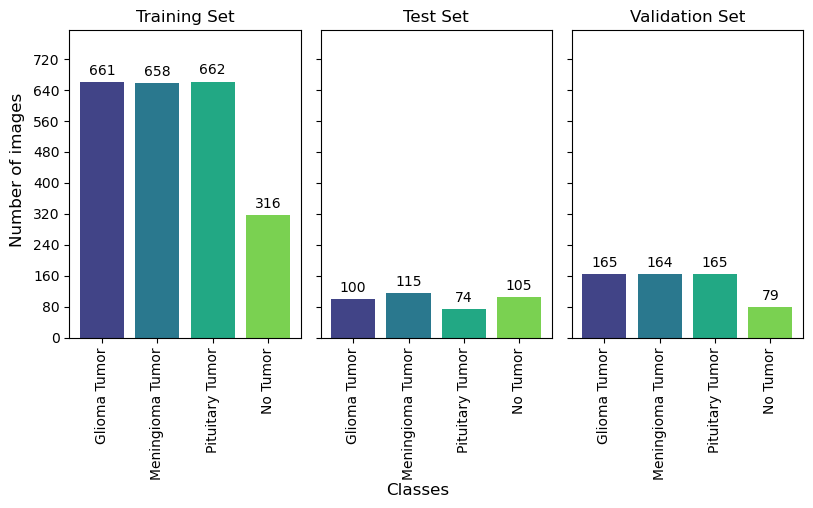

In [41]:
# Now lets observe our new distribution
import matplotlib.pyplot as plt
import os
import matplotlib.ticker as ticker
%matplotlib inline

# Define validation folder
validation_folder = os.path.join(data, "Validation/")

# Define class subdirectories for val folder
glioma_tumor_val = os.path.join(validation_folder, "glioma_tumor/")
meningioma_tumor_val = os.path.join(validation_folder, "meningioma_tumor")
no_tumor_val = os.path.join(validation_folder, "no_tumor")
pituitary_tumor_val = os.path.join(validation_folder, "pituitary_tumor")

# Define counts
train_counts = {
    "Glioma Tumor": len(os.listdir(glioma_tumor_train)),
    "Meningioma Tumor": len(os.listdir(meningioma_tumor_train)),
    "Pituitary Tumor": len(os.listdir(pituitary_tumor_train)),
    "No Tumor": len(os.listdir(no_tumor_train))
}

test_counts = {
    "Glioma Tumor": len(os.listdir(glioma_tumor_test)),
    "Meningioma Tumor": len(os.listdir(meningioma_tumor_test)),
    "Pituitary Tumor": len(os.listdir(pituitary_tumor_test)),
    "No Tumor": len(os.listdir(no_tumor_test))
}

val_counts = {
    "Glioma Tumor": len(os.listdir(glioma_tumor_val)),
    "Meningioma Tumor": len(os.listdir(meningioma_tumor_val)),
    "Pituitary Tumor": len(os.listdir(pituitary_tumor_val)),
    "No Tumor": len(os.listdir(no_tumor_val))
}

# Generate a segmented colormap
viridis = plt.cm.viridis
colors = viridis([0.2, 0.4, 0.6, 0.8])  # Divide viridis into four segments

# Plot distributions
fig, ax = plt.subplots(1, 3, figsize=(8,5), facecolor='white', sharex=True, sharey=True)

# Function to add labels on top of bars
def add_labels(ax, counts):
    for bar, count in zip(ax.patches, counts.values()):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')


# Plot Train subplot
ax[0].bar(train_counts.keys(), train_counts.values(), color=colors, label="Train")
ax[0].set_title("Training Set")
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_ylim(0, max(train_counts.values()) * 1.2)
ax[0].yaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Set major ticks to integer values
add_labels(ax[0], train_counts)

# Plot Test subplot
ax[1].bar(test_counts.keys(), test_counts.values(), color=colors, label="Test")
ax[1].set_title("Test Set")
ax[1].tick_params(axis='x', rotation=90)
add_labels(ax[1], test_counts)

# Plot validation subplot
ax[2].bar(val_counts.keys(), val_counts.values(), color=colors, label="Validation")
ax[2].set_title("Validation Set")
ax[2].tick_params(axis='x', rotation=90)
add_labels(ax[2], val_counts)

# Set common x-label for both subplots
fig.text(0.5, 0, 'Classes', ha='center', fontsize=12)

# Set common y-label for both subplots
fig.text(-0.01, 0.65, 'Number of images', va='center', rotation=90, fontsize=12)

plt.tight_layout()
plt.show()